In [71]:
import glob
import numpy as np

import PIL

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [48]:
path = r"/Users/thierryksstentini/Documents/Python_divers/GitHub/Food_Recognition/plato_dataset/obj_train_data"
data_txt = glob.glob(path + '/*.txt')
data_img = glob.glob(path + '/*.jpg')

In [79]:
def plot_bboxes(annotations, img_name, path):
    annotations_idx = annotations[img_name]
    img_idx = PIL.Image.open(path + '/' + img_name + '.jpg').convert('RGB')
    img_W = img_idx.size[0]
    img_H = img_idx.size[1]

    fig, ax = plt.subplots()
    ax.imshow(img_idx)
    for k in annotations_idx.keys():
        cx = annotations_idx[k][0]
        cy = annotations_idx[k][1]
        rw = annotations_idx[k][2]
        rh = annotations_idx[k][3]
        
        cx_abs = img_W * cx
        cy_abs = img_H * cy
        
        x = cx_abs - (img_W * (rw/2)) 
        y = cy_abs - (img_H*(rh/2))
        
        w = img_W * rw
        h = img_H * rh
        
        rect = patches.Rectangle((x, y), w, h, facecolor='none', edgecolor='r') #edgecolor=color[k])
        ax.add_patch(rect)

    plt.show()

In [46]:
annotations = {}
for file in data_txt:
    obj_dict = {}
    with open(file, 'r') as f:
        line = f.readline()
        while len(line) != 0:
            annot_split = line.split()
            annot_split_float = [float(k) for k in annot_split[1:]]
            label = int(annot_split[0])
            obj_dict[label] = annot_split_float
            line = f.readline()
        
        if bool(obj_dict):
            start = file.rfind('/')+1
            end = file.rfind('.txt')
            key = file[start : end]
            annotations[key] = obj_dict

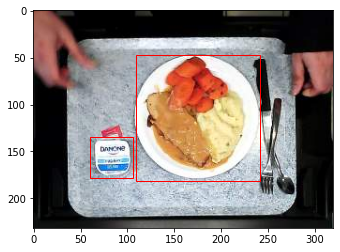

In [80]:
img_name = '20220308112654_000042_059_0000000001_B______xx_C (2577)'
plot_bboxes(annotations, img_name, path)